In [1]:
#import the dataset from the kears
from tensorflow.keras.datasets import imdb

In [2]:
#split the data into the traing and testing and select the 10k unique words
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
#show the training data shape is 25k reviews
train_data.shape

(25000,)

In [4]:
#show the testing data shape is 25k reviews
test_data.shape

(25000,)

In [5]:
# this is showing the largest index across all reviews
max([max(sequence) for sequence in train_data])

9999

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

np.int64(1)

In [8]:
# give the index of each word which is given in the dataset
word_index = imdb.get_word_index()

In [9]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
#higest word index in the entire vocab
val = word_index.values()
max(val)

88584

In [11]:
#decode back the reviews into the text
revers_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)

In [12]:
revers_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [13]:
#decode specific review
decode_review = " ".join(
    [revers_word_index.get(i-3,"?") for i in train_data[0]]
)

In [14]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
import numpy as np

In [16]:
#multi-hot encoding
def vectorize_sequence(sequences,dimension):
#create a matrix of zeros row(number of reviews),colums(vocab size(10k))
  results = np.zeros((len(sequences),dimension))
#loop over each review (sequence) and gives the row index(i)
  for i,sequence in enumerate(sequences):
#loop over the each word index j in the review
    for j in sequence:
# mark the word j appers in review i
       results[i, j] = 1
# retuen the results
  return results

In [17]:
a = vectorize_sequence(train_data,10000)

In [18]:
len(a[0])

10000

In [19]:
# convert the both train and test data into the mutli hot encoding
x_train = vectorize_sequence(train_data,10000)
x_test = vectorize_sequence(test_data,10000)

In [20]:
len(x_train[0])

10000

In [21]:
x_train.shape

(25000, 10000)

In [22]:
x_test.shape

(25000, 10000)

In [23]:
# covert the labels type bcz tensorflow expect with sigmoid and binary_crossentropy
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [24]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
model = keras.Sequential([

                          layers.Dense(32,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1, activation="sigmoid")
                          ])

In [27]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [28]:
# split data into the validation form 25k train is on 15k and 10k for val
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
history = model.fit(partial_x_train,partial_y_train,epochs=5,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.6900 - loss: 0.6217 - val_accuracy: 0.8725 - val_loss: 0.3593
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9030 - loss: 0.2809 - val_accuracy: 0.8861 - val_loss: 0.2888
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9472 - loss: 0.1659 - val_accuracy: 0.8860 - val_loss: 0.2877
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9681 - loss: 0.1131 - val_accuracy: 0.8816 - val_loss: 0.3144
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9819 - loss: 0.0772 - val_accuracy: 0.8786 - val_loss: 0.3507


In [30]:
history_dic = history.history
history_dic.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
y_pred = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [32]:
y_pred[0]

array([0.12898146], dtype=float32)

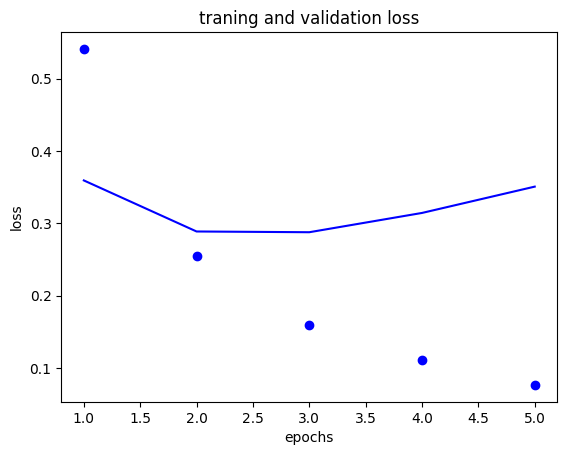

In [33]:
import matplotlib.pyplot as plt
loss_values = history_dic["loss"]
val_loss_values = history_dic["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,"bo",label=["traning loss"])
plt.plot(epochs, val_loss_values,"b",label=["val loss"])
plt.title("traning and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
# plt.legned()
plt.show()


In [34]:
results = model.evaluate(x_test,y_test)
print("test loss & accuracy:", results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8629 - loss: 0.3858
test loss & accuracy: [0.37975195050239563, 0.8669599890708923]
